# Map of SolarStations.org

In [1]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import pandas as pd
import cartopy
import cartopy.crs as ccrs

In order to have some example data to plot, we'll import coordinates of solar radiation monitoring stations from [SolarStations.org](https://SolarStations.org):

In [2]:
solarstations_url = 'https://raw.githubusercontent.com/AssessingSolar/solarstations/main/solarstations.csv'
esampstations_url = 'https://raw.githubusercontent.com/AssessingSolar/solarstations/main/esmap_stations.csv'

solarstations = pd.read_csv(solarstations_url, dtype={'Tier': str}).fillna('')
esmap_stations = pd.read_csv(esampstations_url, dtype={'Tier': str}).fillna('')
stations = pd.concat([solarstations, esmap_stations], axis='rows', ignore_index=True)

stations.iloc[:3, :8]  # Show part of the DataFrame

,Station full name,Abbreviation,State,Country,Latitude,Longitude,Elevation,Time period
0,Abashiri,ABS,,Japan,44.0178,144.2797,38.0,2021-
1,Alert,ALE,Lincoln Sea,Canada,82.4900,-62.4200,127.0,2004-2014
2,Alice Springs,ASP,Northern Territory,Australia,-23.7951,133.8890,546.0,1995-


In [3]:
def station_status(time_period):
    if time_period.endswith('-'):
        return 'Active'
        color = '#008000'  # Green for active stations
    elif (time_period == '') | time_period.endswith('?'):
        return 'Unknown'
    else:
        return 'Inactive'

stations['Status'] = stations['Time period'].map(station_status)

status_dict = {
    'Active': '#008000',  # Green for active stations
    'Unknown': '#3186cc',  # Blue for stations with unknown status
    'Inactive': '#ff422b',  # Red for inactive stations
}

stations['Color'] = stations['Status'].map(status_dict)

z_order_dict = {'Active': 2, 'Unknown': 1, 'Inactive': 0}
stations['z_order'] = stations['Status'].map(z_order_dict)

stations = stations.sort_values('z_order')

legend_elements = []
for status, color in status_dict.items():
    legend_elements.append(Line2D([0], [0], marker='o', lw=0,
                                  label=status, color='none',
                                  markerfacecolor=color, markersize=7)
    )

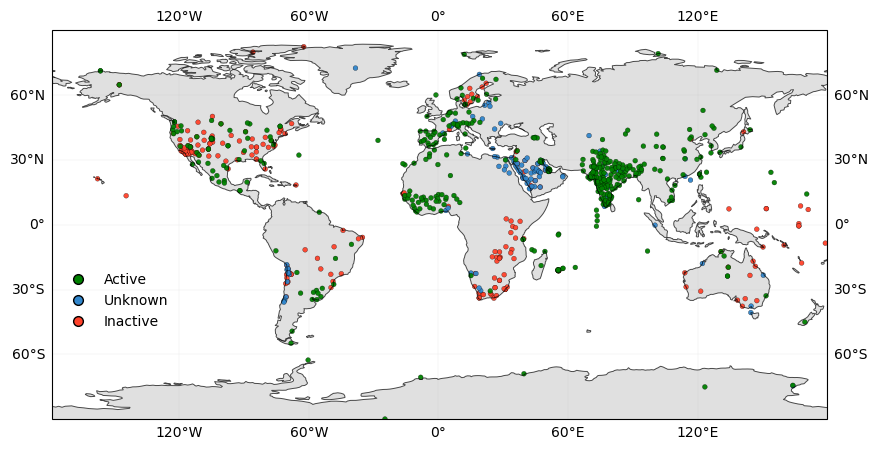

In [14]:
crs = ccrs.PlateCarree()  # Map projection

c='red'

fig, ax = plt.subplots(figsize=(10,8), subplot_kw={'projection': crs})

# Set limits of main map [min_lon, max_lon, min_lat, max_lat]
ax.set_extent([-179, 180, -90, 90])

# Add land borders, coastline, and gridlines to main map
ax.add_feature(cartopy.feature.LAND, facecolor='lightgrey', alpha=0.7, zorder=0)
ax.coastlines(edgecolor='black', lw=0.7, alpha=0.7, zorder=3)
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, alpha=0.7, lw=0.1, zorder=-1)

# Add points of solar stations
# it is important to specify `transform=ccrs.PlateCarree()` to transform the points from
# regular latitude/longitude (PlateCarree) to the specific map projection
stations.plot.scatter(ax=ax, x='Longitude', y='Latitude',
                      c='Color', alpha=0.95, s=12, edgecolor='k', lw=0.2,
                      transform=ccrs.PlateCarree())

# Create the figure
ax.legend(handles=legend_elements, loc='lower left',
          frameon=False, bbox_to_anchor=[0, 0.2])

ax.patch.set_facecolor('white')

fig.savefig('stations_map.png', dpi=1200, bbox_inches='tight',
            facecolor="none")
plt.show()